# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [316]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [317]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [318]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
The data set has 1,898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [319]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
restaurant_name, cuisine_type, day_of_the_week, and rating are all object data types.
order_id, customer_id, food_preparation_time, and delivery_time are all integer data types.
cost_of_the_order is the only float data type.
All columns have 1,898 entries which means there are no null values.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [320]:
# Looking at the dataframe to calculate the sum of missing vales for each column
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [322]:
#the describe function is used to view statistical details from a dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [323]:
# Created a variable for the minimum amount of time it took to prepare the food
food_prep_min = df['food_preparation_time'].min()

#Print statement to display the minimum amount of time it took to prepare the food
print('The minimum amount of time it took for the food to be prepared once an order was placed is', food_prep_min,'minutes')

# Created a variable for the average amount of time it took to prepare the food
food_prep_mean = df['food_preparation_time'].mean()

#Created a variable to round the average time to 2 decimal places
rounded_food_prep_mean = round(food_prep_mean,2)

#Print statement to display the average amount of time it took to prepare the food
print('The average amount of time it took for the food to be prepared once an order was placed is', rounded_food_prep_mean,'minutes')

# Created a variable for the maximum amount of time it took to prepare the food
food_prep_max = df['food_preparation_time'].max()

#Print statement to display the maximum amount of time it took to prepare the food
print('The maximum amount of time it took for the food to be prepared once an order was placed is', food_prep_max,'minutes')

The minimum amount of time it took for the food to be prepared once an order was placed is 20 minutes
The average amount of time it took for the food to be prepared once an order was placed is 27.37 minutes
The maximum amount of time it took for the food to be prepared once an order was placed is 35 minutes


#### Observations:
The minimum time was 20 minutes, the average time was 27.37 minutes, and the max time was 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [324]:
# The code below shows the sum for all the different ratings
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
There are 736 orders with no rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [325]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

#finding how many different order id's there are
df['order_id'].nunique()

1898

Each order_id is unique

In [326]:
#finding how many different customer id's there are
df['customer_id'].nunique()

1200

<Axes: xlabel='customer_id', ylabel='count'>

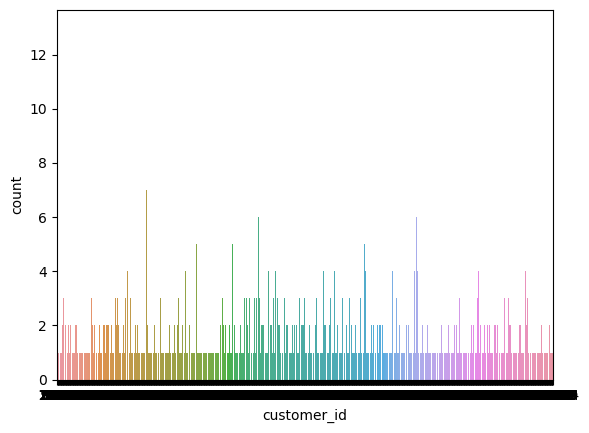

In [327]:
#Made a countplot for the customer_id column
sns.countplot(data=df, x='customer_id')

1200 different customer_id values which means some people had multiple orders.

In [328]:
 #finding how many different restaurants there are
df['restaurant_name'].nunique()

178

<Axes: xlabel='restaurant_name', ylabel='Count'>

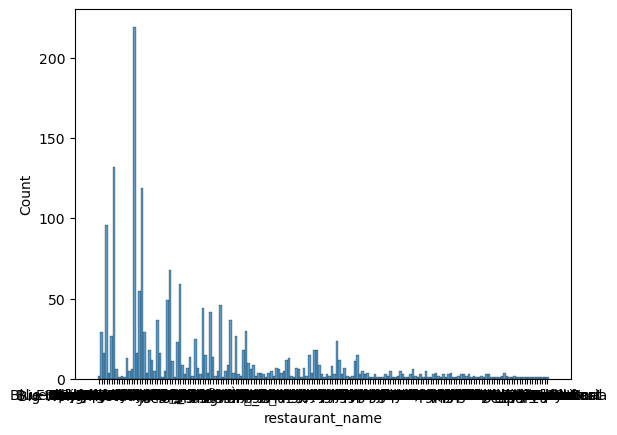

In [329]:
#Histogram for the restaurant_name column
sns.histplot(data = df, x='restaurant_name')

178 different restaurants with some having 1 order with one having over 200

In [330]:
 #finding how many different cuisine types there are
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

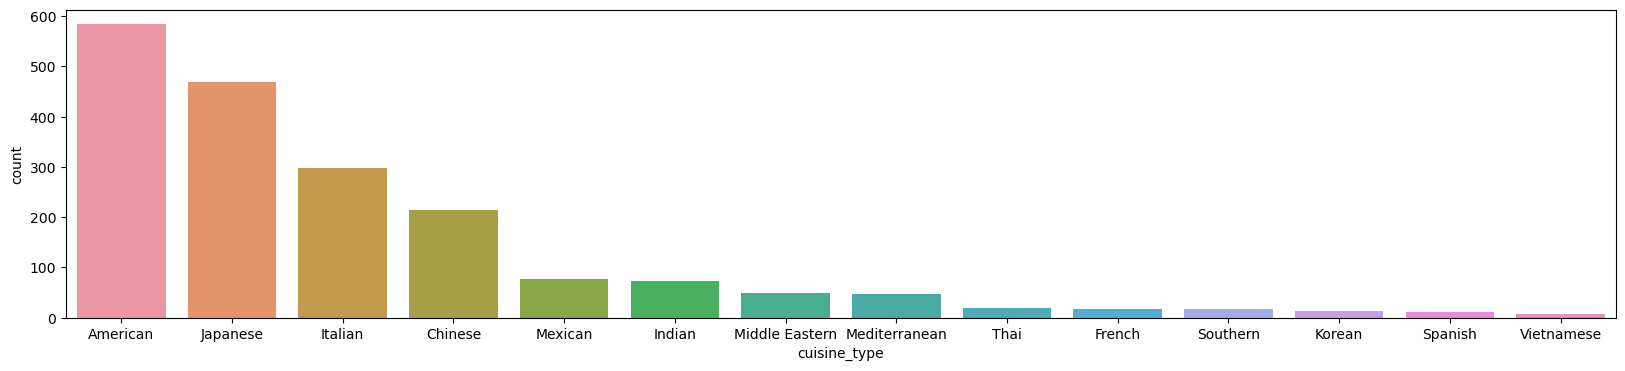

In [331]:
#adjusting the size of the countplot to fit all the different cuisines
plt.figure(figsize=(20,4))
#creating a countplot for the cuisine types and arranged them from highest to lowest
sns.countplot(data = df, x='cuisine_type', order = df.cuisine_type.value_counts().index)

<Axes: xlabel='cuisine_type', ylabel='Count'>

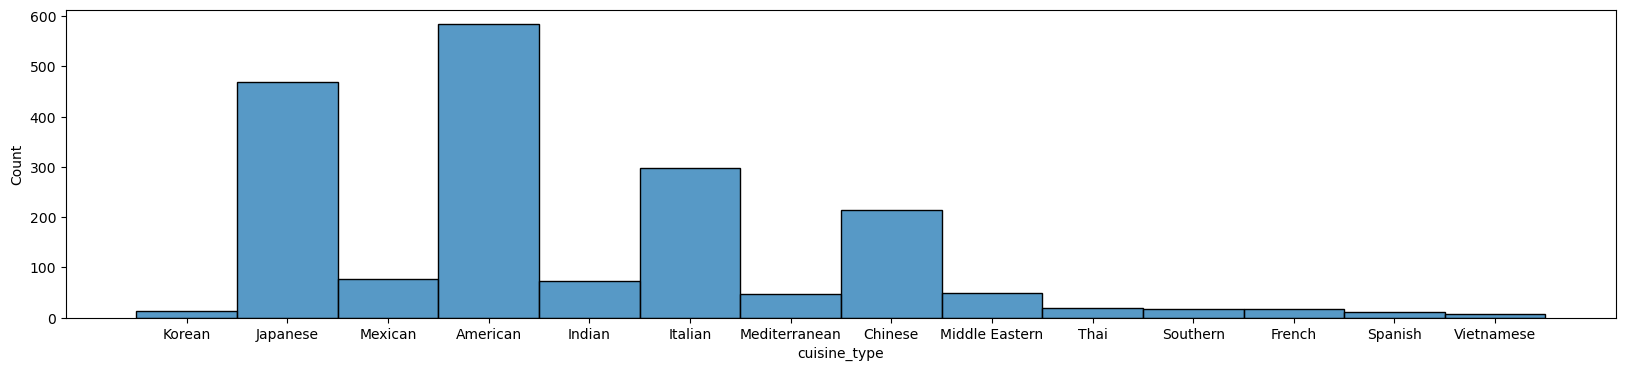

In [332]:
#adjusting size of histogram to be able to read all the cuisines
plt.figure(figsize=(20,4))
#create a histplot for cuisine_type
sns.histplot(df.cuisine_type)

In [333]:
 #finding how many different costs there are
df['cost_of_the_order'].nunique()

312

In [334]:
#adjusted the size of the countplot try and fit all the values
plt.figure(figsize=(200,75))

#created a countplot for cost of the order and arranged them from highest to lowest
sns.countplot(data = df, x = 'cost_of_the_order',order = df.cost_of_the_order.value_counts().index)

<Axes: xlabel='cost_of_the_order', ylabel='count'>

<Axes: xlabel='cost_of_the_order'>

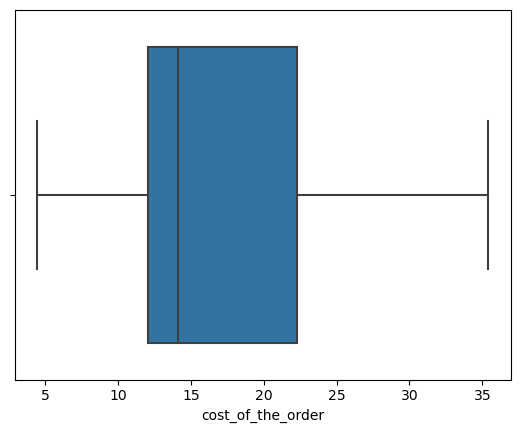

In [335]:
#boxplot to show the values in cost_of_the_order
sns.boxplot(data = df, x='cost_of_the_order')

In [336]:
 #Seeing the unique values for day of the week
df['day_of_the_week'].nunique()
 #only have weekend or weekday

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

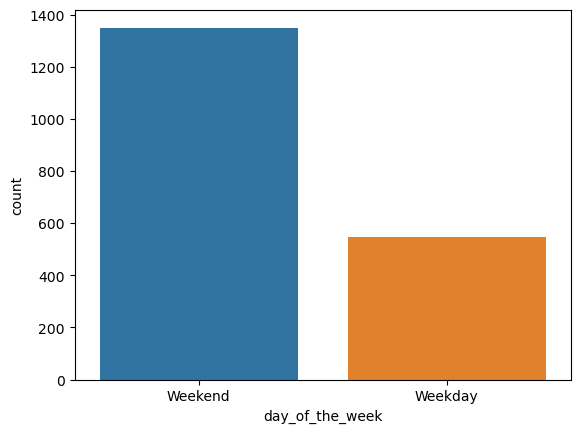

In [337]:
#Created a countplot for day of the week
sns.countplot(data = df, x='day_of_the_week')

<Axes: xlabel='day_of_the_week', ylabel='Count'>

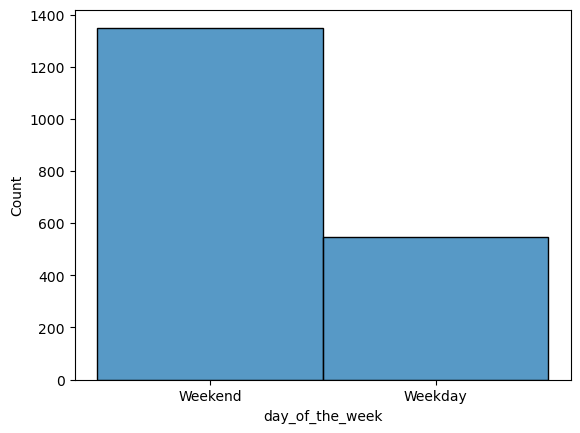

In [338]:
#Created a histogram for day of the week
sns.histplot(data=df, x='day_of_the_week')

In [339]:
 #finding how many different ratings there are
df['rating'].nunique()

4

<Axes: xlabel='rating', ylabel='count'>

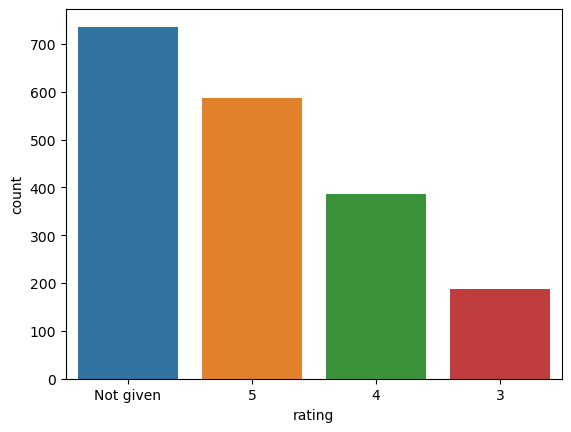

In [340]:
#Created a countplot for the ratings
sns.countplot(data = df, x='rating',order = df.rating.value_counts().index)

<Axes: xlabel='rating', ylabel='Count'>

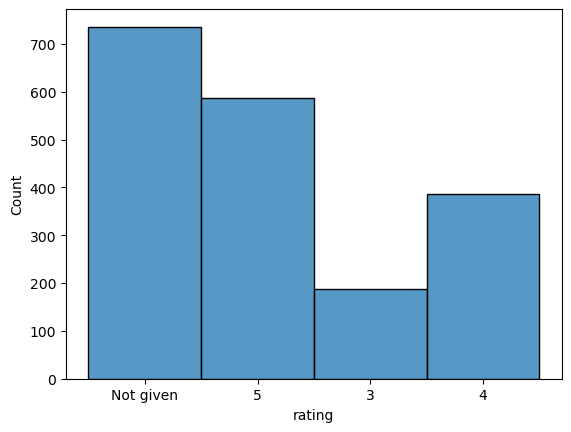

In [341]:
#Created a histogram for the ratings
sns.histplot(data = df, x='rating')

In [342]:
 #finding how many different food prep times there are
df['food_preparation_time'].nunique()

16

<Axes: xlabel='food_preparation_time', ylabel='Count'>

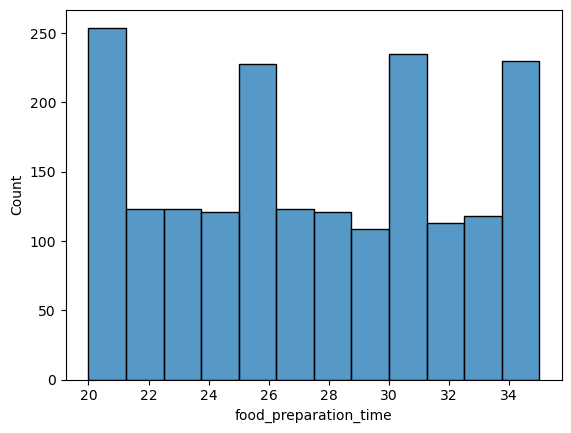

In [343]:
#Created a histogram for food prep time
sns.histplot(data=df, x='food_preparation_time')

<Axes: xlabel='food_preparation_time', ylabel='count'>

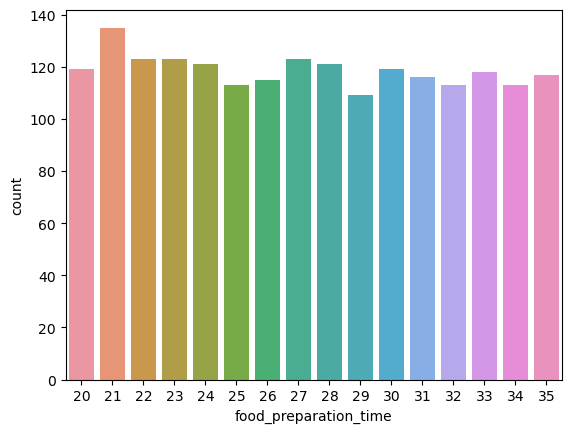

In [344]:
#created a countplot for food prep time
sns.countplot(data=df, x='food_preparation_time')

<Axes: xlabel='food_preparation_time'>

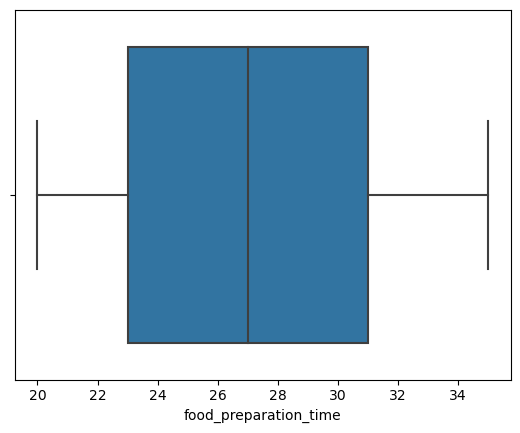

In [345]:
#created a boxplot for food prep time
sns.boxplot(data=df, x='food_preparation_time')

In [346]:
 #Finding how many different delivery times there are
df['delivery_time'].nunique()

19

<Axes: xlabel='delivery_time'>

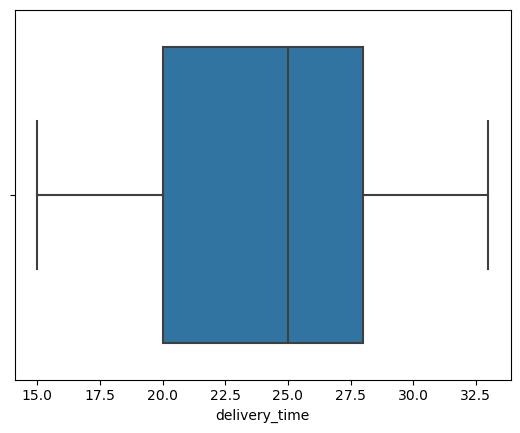

In [347]:
#created a boxplot for delivery time
sns.boxplot(data = df, x='delivery_time')

<Axes: xlabel='delivery_time', ylabel='Count'>

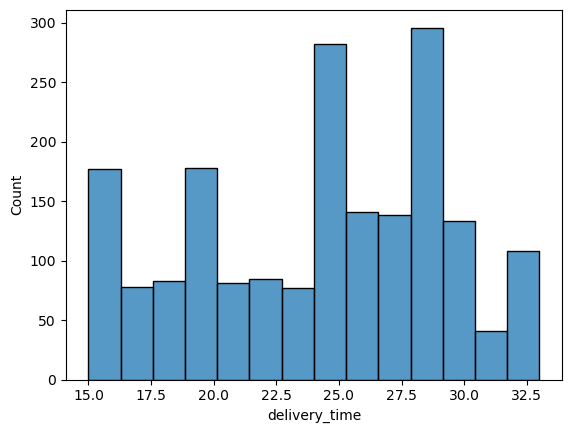

In [348]:
#created a histogram for delivery time
sns.histplot(data = df, x='delivery_time')

<Axes: xlabel='delivery_time', ylabel='count'>

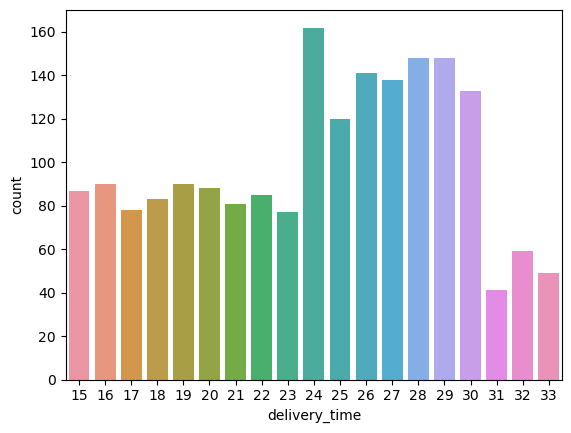

In [349]:
#Created a countplot for delivery time
sns.countplot(data = df, x='delivery_time')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [350]:
# Looked at which restaurants had the most orders through .value_counts() and showed the top 5 through .head()
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake Shack has the most orders with 219 orders. The Meatball Shop has the second most with 132 orders. Blue Ribbon Sushi has the third most with 119 orders. Blue Ribbon Fried Chicken has the fourth most with 96 orders. Parm has the fifth most with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [351]:
# Used .groupby() to look at the different cuisine types and days of the week then sorted them from highest to lowest

df.groupby(['cuisine_type','day_of_the_week']).size().sort_values(ascending=False).to_frame()

,,0
cuisine_type,day_of_the_week,
American,Weekend,415
Japanese,Weekend,335
Italian,Weekend,207
American,Weekday,169
Chinese,Weekend,163
Japanese,Weekday,135
Italian,Weekday,91
Mexican,Weekend,53
Chinese,Weekday,52


#### Observations:
American is the most popular cuisine_type on the weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [352]:
# Looked at all the cost of orders greater than 20, the summed them, and then divided by the total orders
(df['cost_of_the_order'] > 20).sum()/df['cost_of_the_order'].count()

0.2924130663856691

#### Observations:
29% of the orders cost more than $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [353]:
# Used the .mean() function to look at the mean value for delivery times
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [354]:
# Used the .value_counts() for customer id to see which customers had the most orders, then used .head(3) to show the first 3
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
52832 had the most orders placed at 13. 47440 had the second most orders placed at 10. 83287 had the third most orders placed with 9.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: xlabel='cuisine_type', ylabel='delivery_time'>

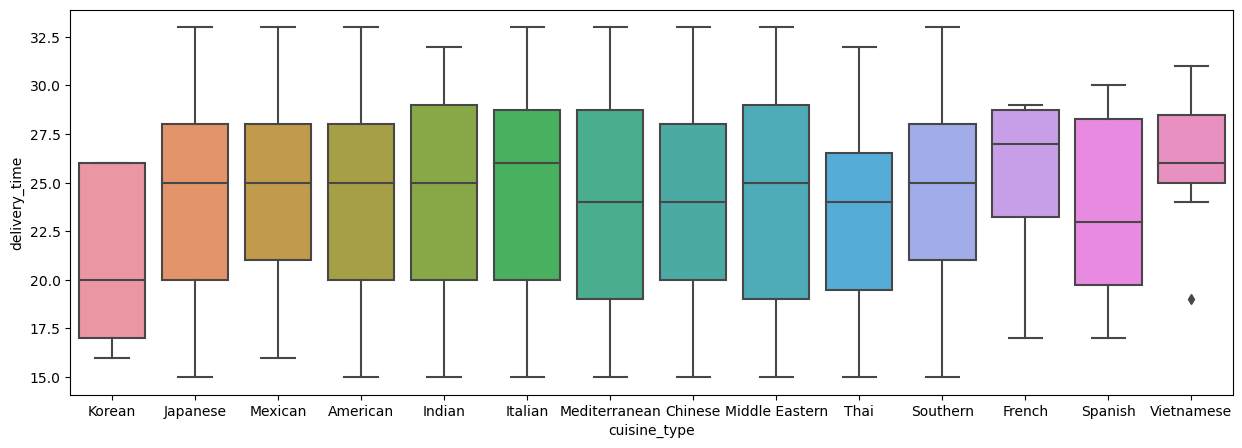

In [355]:
# Created a boxplot to compare the delivery time for each cuisine type
plt.figure(figsize=(15,5))
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = df)

<Axes: xlabel='cuisine_type', ylabel='food_preparation_time'>

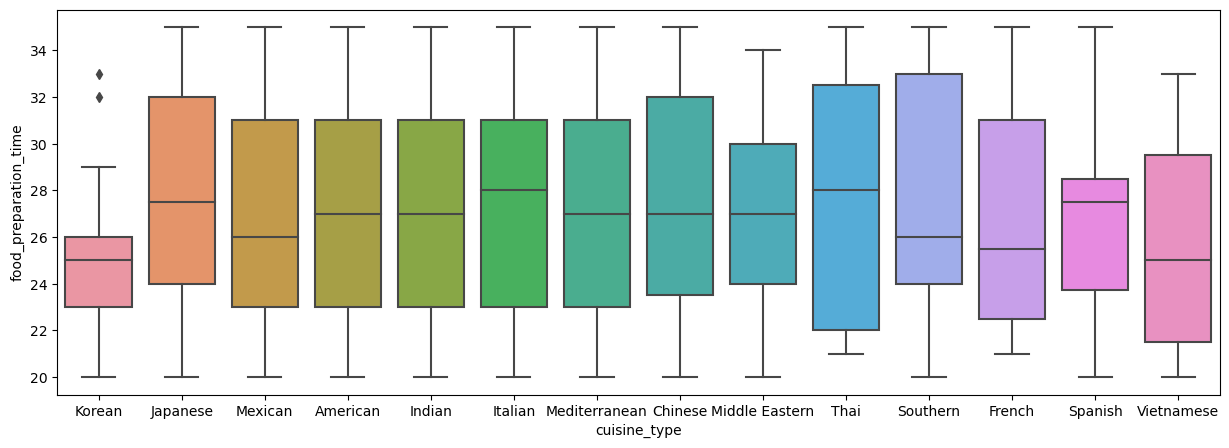

In [356]:
#created a boxplot to compare the preparation time for each cuisine type
plt.figure(figsize=(15,5))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)

<Axes: xlabel='cuisine_type', ylabel='cost_of_the_order'>

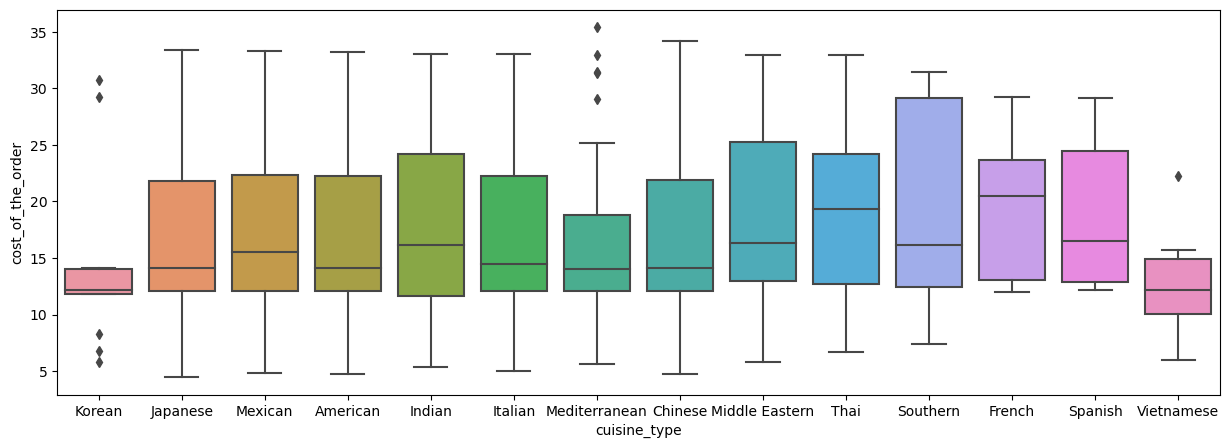

In [357]:
#created a boxplot to compare the cost of the order for each cuisine type
plt.figure(figsize=(15,5))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)

<Axes: xlabel='day_of_the_week', ylabel='cost_of_the_order'>

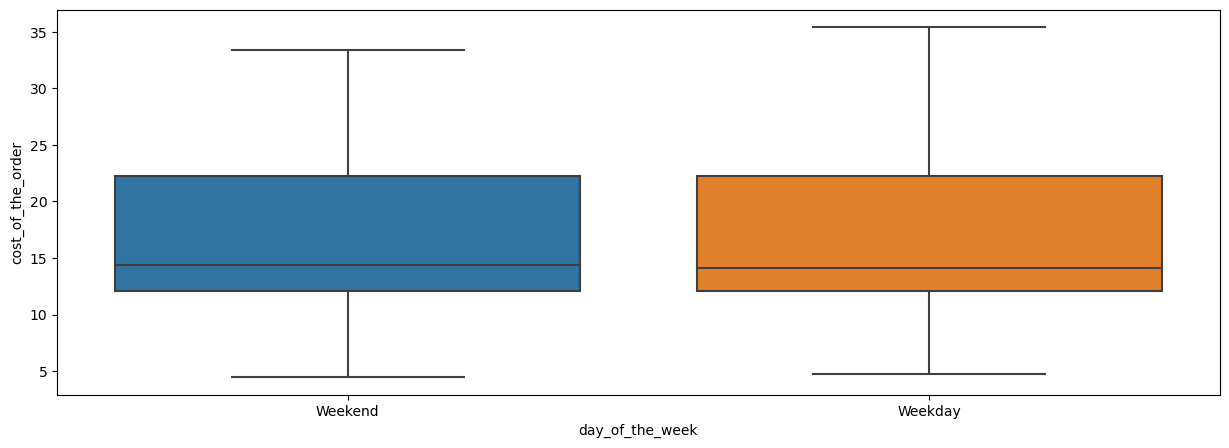

In [358]:
#created a boxplot to compare the cost of the order for each day of the week
plt.figure(figsize=(15,5))
sns.boxplot(x = "day_of_the_week", y = "cost_of_the_order", data = df)

<Axes: xlabel='day_of_the_week', ylabel='food_preparation_time'>

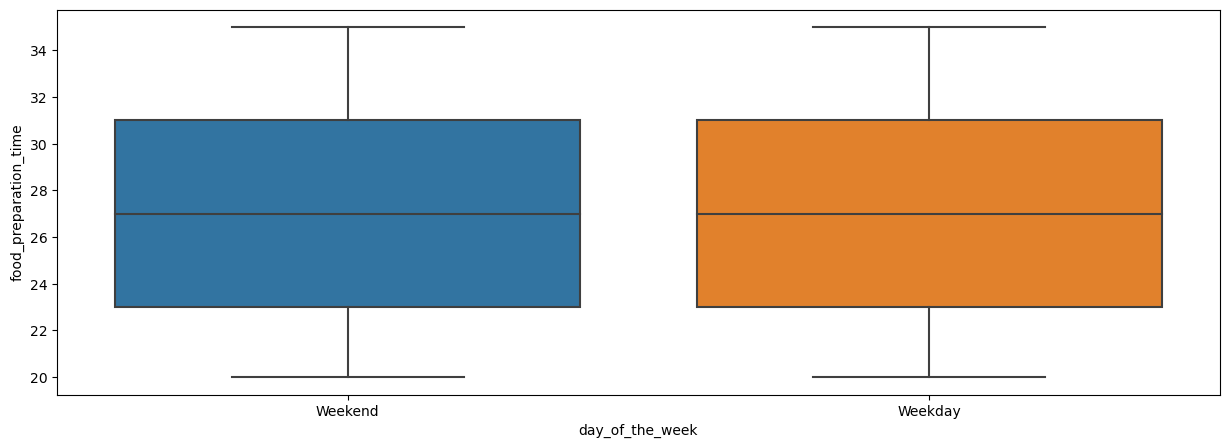

In [359]:
#created  a boxplot to compare the food preparation time for each day of the week
plt.figure(figsize=(15,5))
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = df)

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

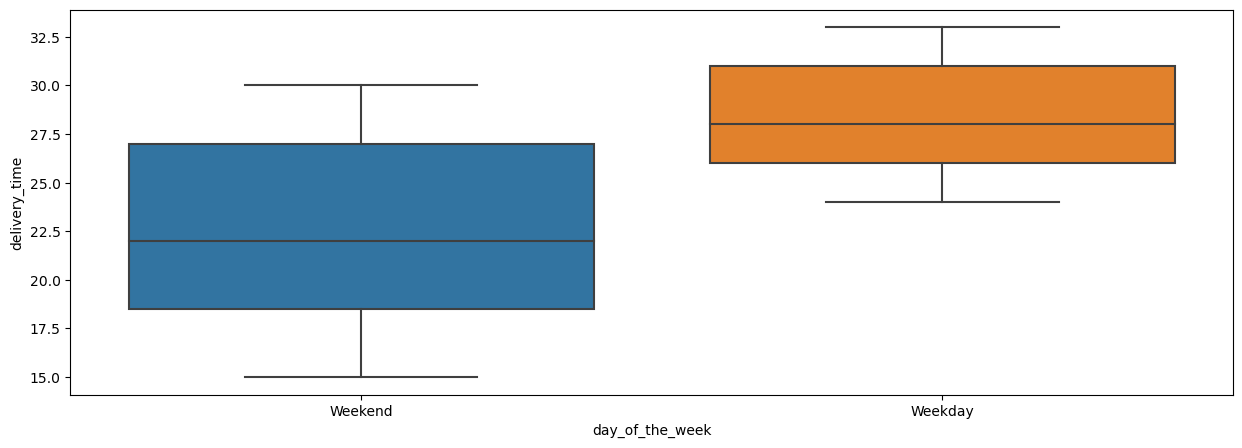

In [360]:
#Created a boxplot to compare the delivery time for each day of the week
plt.figure(figsize=(15,5))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)

<Axes: >

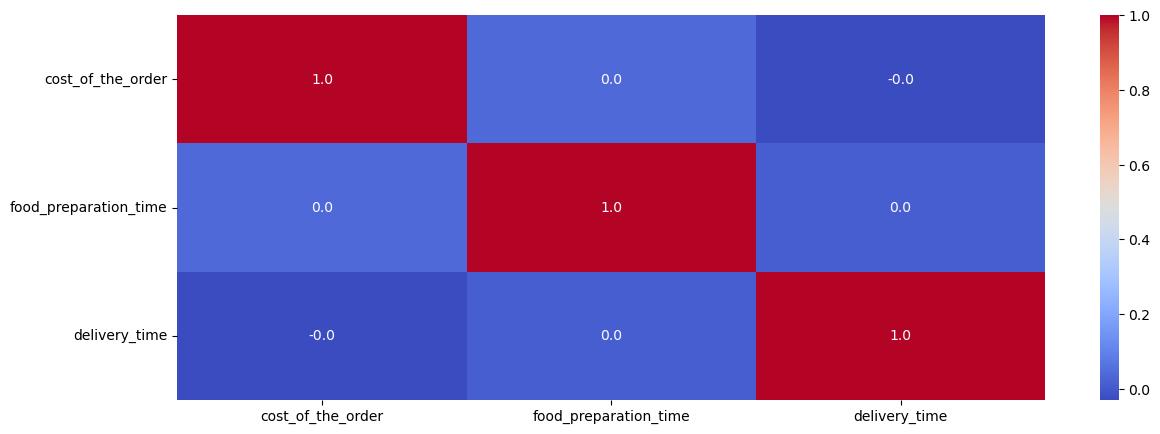

In [361]:
#created a variable with a list containing the numeric columns
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
#created a variable that uses the .corr() function. .corr() is used to find the correlation among columns in a dataframe
corr = df[num_var].corr()

#created a heatmap to look at the correlation for the num_var values
plt.figure(figsize = (14,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
           fmt = '.1f',
            xticklabels = corr.columns,
            yticklabels = corr.columns)

<Axes: xlabel='rating', ylabel='delivery_time'>

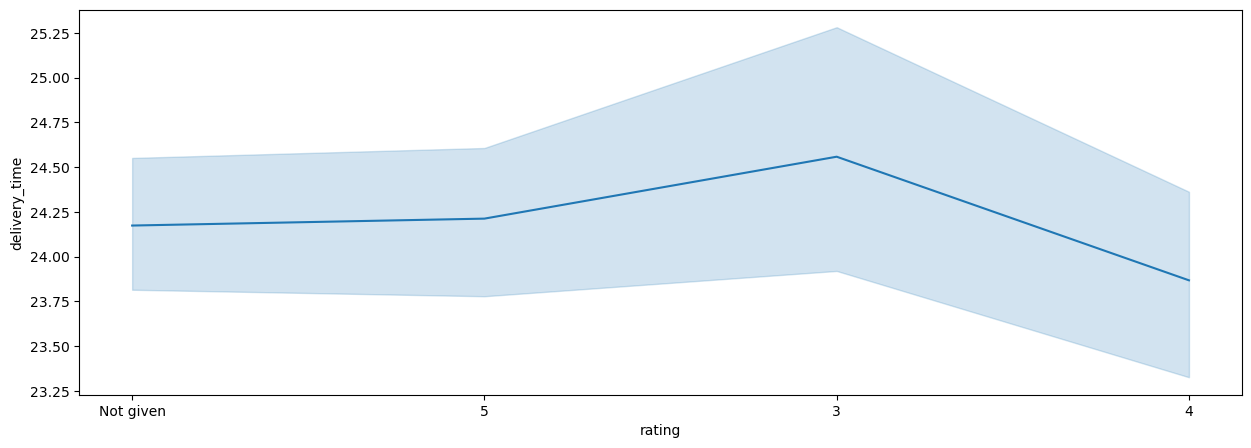

In [362]:
#created a line plot to look at the correlation between rating and delivery time
plt.figure(figsize = (15,5))
sns.lineplot(x='rating', y='delivery_time', data = df)

<Axes: xlabel='rating', ylabel='food_preparation_time'>

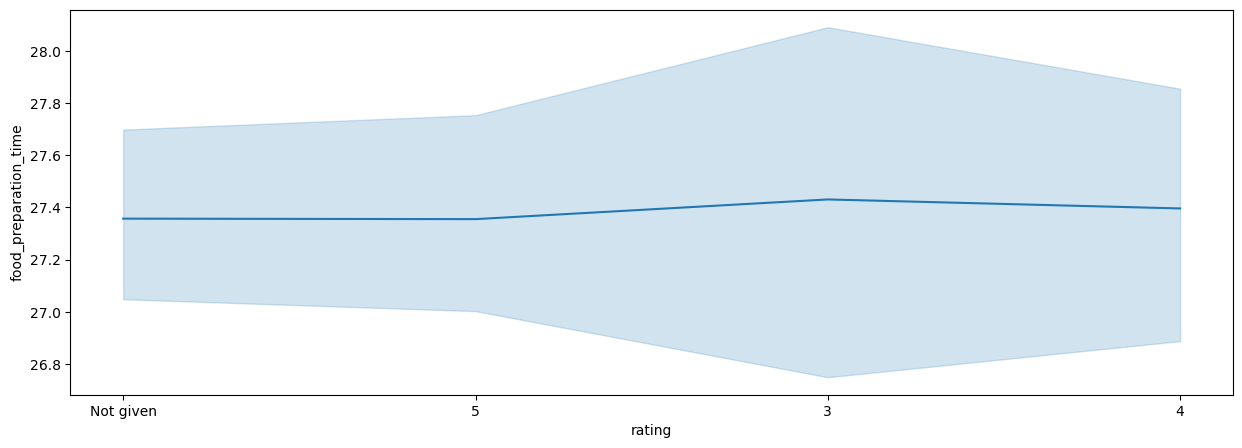

In [363]:
##created a line plot to look at the correlation between rating and food preparation time
plt.figure(figsize = (15,5))
sns.lineplot(x='rating', y='food_preparation_time', data = df)

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

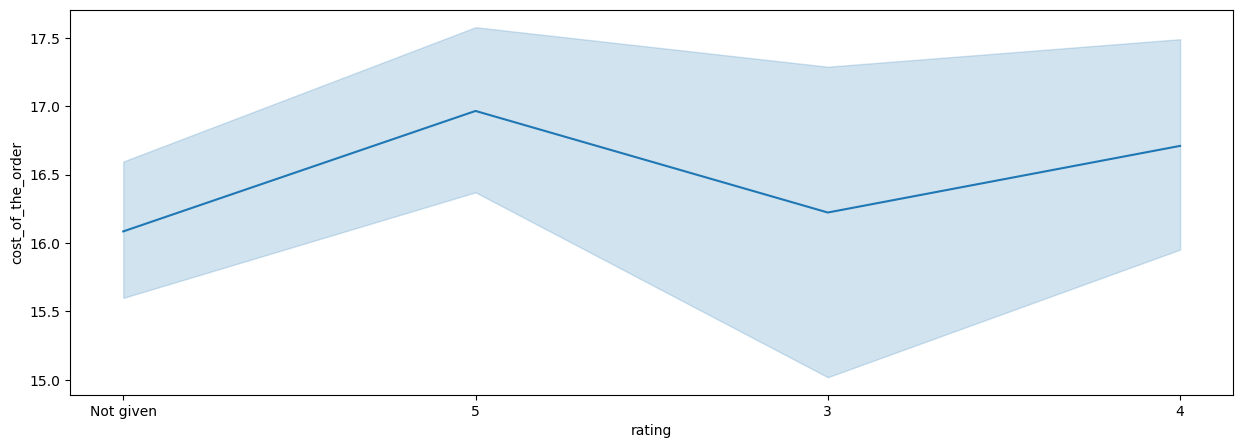

In [364]:
##created a line plot to look at the correlation between rating and delivery time
plt.figure(figsize = (15,5))
sns.lineplot(x='rating', y='cost_of_the_order', data = df)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [366]:
# Get rid of restaurants with no rating
rated_rest = df[df['rating'] != 'Not given'].copy()

#turn the rating column into an integer
rated_rest['rating'] = rated_rest['rating'].astype('int')

#sort the count of ratings from highest to lowest
rated_rest_count = rated_rest.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
rated_rest_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [367]:
#create a variable to calculate the mean of the ratings
rated_rest_mean = rated_rest.groupby('restaurant_name')['rating'].mean().reset_index()
rated_rest_mean

,restaurant_name,rating
0,'wichcraft,5.000000
1,12 Chairs,4.500000
2,5 Napkin Burger,4.000000
3,67 Burger,5.000000
4,Amma,4.500000
...,...,...
151,Zero Otto Nove,4.000000
152,brgr,3.000000
153,da Umberto,5.000000
154,ilili Restaurant,4.153846


In [368]:
#merge the two data frames together
rated_rest_count = rated_rest_count.merge(rated_rest_mean, on='restaurant_name', how='left')

#rename the two columns to rating and mean rating
rated_rest_count = rated_rest_count.rename(columns={'rating_x': 'rating', 'rating_y': 'mean_rating'})
rated_rest_count

,restaurant_name,rating,mean_rating
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125
4,RedFarm Broadway,41,4.243902
...,...,...,...
151,Frank Restaurant,1,4.000000
152,Socarrat Paella Bar,1,5.000000
153,El Parador Cafe,1,5.000000
154,Lucky Strike,1,4.000000


In [369]:
#only show the restaurants with more than 50 ratings
rest_50 = rated_rest_count[rated_rest_count['rating'] > 50].copy()
rest_50

,restaurant_name,rating,mean_rating
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Shushi, and Blue Ribbon Fried Chicken all have ratings higher than 60 and means higher than 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [370]:
# Show the datafram columns for reference again
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [371]:
#created a function that looks at the cost of the orders
def revenue(cost):
    if cost > 20: #if cost is greater than 20
        return cost * .25 # multiply the cost by .25
    elif cost >5: #if cost is greater than 5
        return cost * .15 # multiply the cost by .15
    else:
        return cost * 0 #if lower than 5 multiply by 0

In [372]:
#adding the net reveue from the order to the dataframe
df['Net_Revenue'] = df['cost_of_the_order'].apply(revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Net_Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [373]:
#creating a variable that sums up the net revenue values
Total_Revenue = df['Net_Revenue'].sum()

In [374]:
#prints the total revenue value
print('Total revenue is: $',Total_Revenue)

Total revenue is: $ 6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [375]:
# Create a variable that adds the food prep time and delivery time together
total_time = df['food_preparation_time'] + df['delivery_time']

In [376]:
#add total time to the data frame
df['total_time'] = total_time

In [377]:
#create a variable that only stores the values for total time over 60
long_deliv = df[df['total_time']>60]

In [378]:
#look at how many rows there are
long_deliv.shape

(200, 11)

In [379]:
#200 orders over 60 minutes
over_sixty = 200

In [380]:
#looking at the original data frame
df.shape

(1898, 11)

In [381]:
#created a variable for the total rows
overall = 1898

In [382]:
#find the percentage of orders over 60 minutes
(over_sixty/overall) * 100

10.537407797681771

#### Observations:
10.53% of the orders take longer than 60 minutes to get delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [383]:
# looking at the data frame columns for reference
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Net_Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [384]:
#used the groupby to look at the mean delivery time for the day of the week
weekday_mean = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()
weekday_mean

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


#### Observations:
It takes around 6 minutes longer to delivery food on the weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American, Japanese, Italian, Chinese and Mexican were the 5 most popular cuisines. 
* The weekend had double the amount of orders as the weekday. 
* The two most common ratings were Not given and 5. 
* Around 70% of the orders were under $20.The delivery time was longer on the weekends. 
* There was no correlation between cost of the food, delivery time, or food preparation time.


### Recommendations:

*  If you are looking to improve your restaurant I would recommend choosing one of the 5 most popular cuisines, American was easily the most popular. 
* 70% of all order were under $20 so I would recommend trying to keep your prices lower. 
* The most common rating was Not given, so I wouldn't worry too much if someone orders something and doesn't give it a rating.
* I would also let the customers know that the delivery time may take longer on weekdays.

---